# Instalación del conector MySQL a Python

Si aparece el error "El complemento de autenticación 'caching_sha2_password' no es compatible" se debe a la versión instalada de MySQL, y a la configuración de instalación de la misma.

Si eliges la configuración recomendada se obtendra el error indicado ya que este error se produce porque MySQL 8.0 y versiones superiores utilizan un complemento de autenticación de contraseña más seguro llamado caching_sha2_password para nuevas cuentas de usuario.

Sin embargo, la biblioteca de Python mysql-connector, ampliamente utilizada, aún no admite este nuevo complemento. Solo admite el mysql_native_passwo rdcomplemento anterior que se utilizaba en versiones anteriores de MySQL.

Entonces, existe una discordancia entre el complemento de autenticación esperado en el servidor MySQL y el compatible con mysql-connector, lo que provoca que las conexiones fallen.

### Instalar el paquete de conexión de MySQL y Python

In [4]:
!pip install mysql-connector-python


Importar el conector MySQL y los parámetros de la conexión con la base de datos

In [6]:
import mysql.connector

try:
    # Intentar la conexión a la base de datos MySQL
    connection = mysql.connector.connect(
    host="localhost",      # Dirección del servidor MySQL (usualmente 'localhost' para local)
    user="root",           # Nombre de usuario de MySQL
    password="Unicorn",    # Contraseña del usuario de MySQL
    database="world"       # Nombre de la base de datos que se utilizará
    )
    
    # Verificar si la conexión fue exitosa
    if connection.is_connected():
        print("Conexión exitosa a la base de datos 'world'")

except mysql.connector.Error as err:
    # Manejo de errores durante la conexión
    print(f"Error al conectar a MySQL: {err}")



Conexión exitosa a la base de datos 'world'


### Importar bibliotecas

In [8]:
import mysql.connector
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### ¿Qué es un Cursor?
Un cursor es un objeto que permite ejecutar comandos SQL en la base de datos y manejar los resultados que devuelven esas consultas. En términos simples, es el intermediario entre tu código Python y la base de datos MySQL.

### Cómo se Crea un Cursor
El cursor se crea utilizando el método .cursor() de un objeto de conexión (mysql.connector.connect).

### Principales usos:
1. Ejecutar consultas SQL: Se puede ejecutar cualquier comando SQL, como SELECT, INSERT, UPDATE, DELETE, o incluso comandos específicos como SHOW TABLES.
2. Recupera resultados. Después de ejecutar una consulta, se pueden obtener los resultados utilizando métodos como:
.fetchone(): Devuelve una fila a la vez.
.fetchmany(size): Devuelve un número específico de filas.
.fetchall(): Devuelve todas las filas de la consulta.
3. Manejar Parámetros en Consultas
El cursor permite usar consultas parametrizadas para evitar inyecciones SQL y manejar datos dinámicos.
4. Confirmar Cambios en la Base de Datos
Si ejecutas una consulta que modifica datos (INSERT, UPDATE, DELETE), debes confirmar los cambios con conn.commit()
5. Controlar el Contexto del Cursor
Puedes usar el cursor dentro de un bloque with, que cierra automáticamente el cursor al finalizar

### Opciones del Cursor
Cuando se crea un cursor, puede configurarse para que maneje los resultados de diferentes maneras:

1. Por Defecto (cursor()): Devuelve los resultados como tuplas.
2. Diccionario (cursor(dictionary=True)): Devuelve los resultados como diccionarios, donde las claves son los nombres de las columnas

En este caso vamos a utilizar la función por defecto para que los resultados sean devueltos como tuplas.

In [10]:
def execute_query(connection, query):
    """Ejecuta una consulta SQL y retorna los resultados como un DataFrame"""
    try:
        cursor = connection.cursor()
        cursor.execute(query)
        result = cursor.fetchall()
        columns = [desc[0] for desc in cursor.description]
        cursor.close()
        return pd.DataFrame(result, columns=columns)
    except mysql.connector.Error as err:
        print(f"Error en la consulta: {err}")
        return None

# Ejercicio 1: Consulta países de Europa

Esta consulta selecciona los nombres y las poblaciones de todos los países del continente europeo

In [13]:
# Consulta para obtener los países de Europa y su población
query1 = """
SELECT Name, Population
FROM country
WHERE Continent = 'Europe';
"""

# Ejecutar la consulta
try:
    result_df = execute_query(connection, query1)
except mysql.connector.Error as err:
    print(f'Error en la consulta: {err}')

# Mostrar el DataFrame
print("Ejercicio 1 - Países de Europa y su población:")
print(result_df)


Ejercicio 1 - Países de Europa y su población:
                             Name  Population
0                         Albania     3401200
1                         Andorra       78000
2                         Austria     8091800
3                         Belgium    10239000
4                        Bulgaria     8190900
5          Bosnia and Herzegovina     3972000
6                         Belarus    10236000
7                     Switzerland     7160400
8                  Czech Republic    10278100
9                         Germany    82164700
10                        Denmark     5330000
11                          Spain    39441700
12                        Estonia     1439200
13                        Finland     5171300
14                         France    59225700
15                  Faroe Islands       43000
16                 United Kingdom    59623400
17                      Gibraltar       25000
18                         Greece    10545700
19                        Croatia

### Gráfico de barras para representar la población de los países

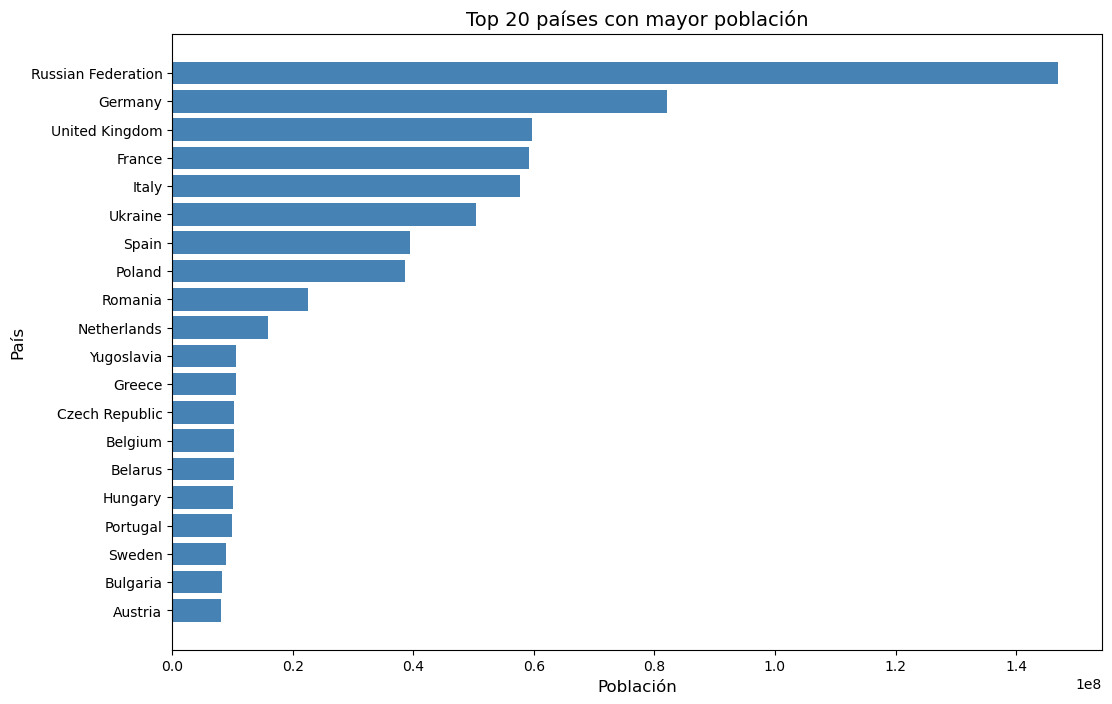

In [15]:
plt.figure(figsize=(12, 8))
sorted_df = result_df.sort_values(by='Population', ascending=False).head(20)  # Top 20 países con mayor población
plt.barh(sorted_df['Name'], sorted_df['Population'], color='steelblue')
plt.xlabel('Población', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.title('Top 20 países con mayor población', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# Ejercicio 2: Cinco países más grandes por área

In [17]:
# Consulta los cinco países más grandes por área
query2 = """
SELECT Name, SurfaceArea
FROM country
ORDER BY SurfaceArea DESC
LIMIT 5;
"""
# Ejecutar la consulta
try:
    result_df = execute_query(connection, query2)
except mysql.connector.Error as err:
    print(f'Error en la consulta: {err}')
# Mostrar el DataFrame
print("Ejercicio 2 - Cinco países más grandes por área:")
print(result_df)

Ejercicio 2 - Cinco países más grandes por área:
                 Name  SurfaceArea
0  Russian Federation  17075400.00
1          Antarctica  13120000.00
2              Canada   9970610.00
3               China   9572900.00
4       United States   9363520.00


### Gráfico de quesito para los cinco países más grandes por área

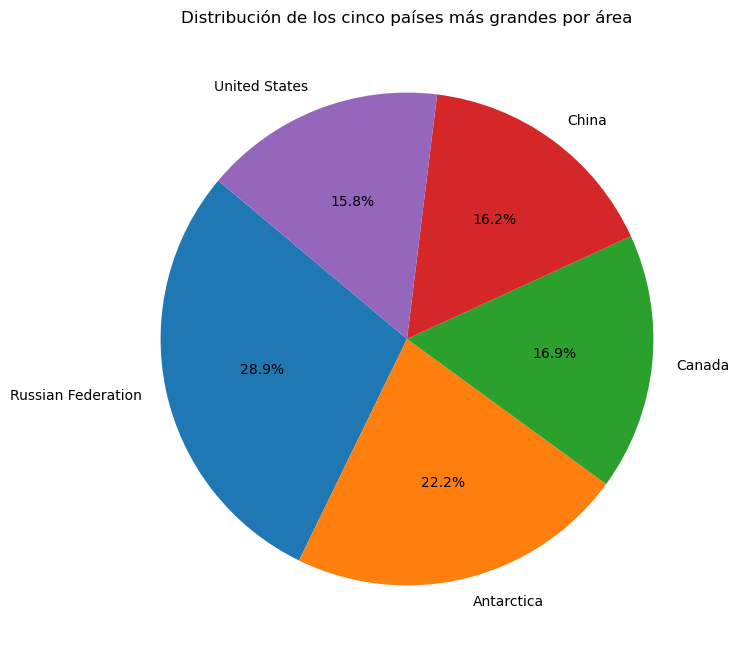

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(result_df['SurfaceArea'], labels=result_df['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los cinco países más grandes por área')
plt.show()



https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

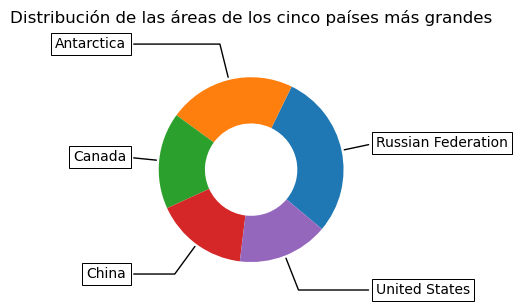

In [21]:


# Datos del ejercicio 2
data = result_df['SurfaceArea']  # Áreas de los países
labels = result_df['Name']  # Nombres de los países

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Crear gráfico de dona
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

# Configuración de anotaciones
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

# Anotar cada porción con los nombres de los países
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1  # Calcular el ángulo medio
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels.iloc[i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, **kw)

# Título del gráfico, movido hacia arriba con el parámetro `y`
ax.set_title("Distribución de las áreas de los cinco países más grandes", y=1.1)

plt.show()


# Ejercicio 3: Población total por continente

In [23]:
# Consulta para obtener la población total por continente
query3 = """
SELECT Continent, SUM(Population) AS TotalPopulation
FROM country
GROUP BY Continent;
"""
# Ejecutar la consulta
try:
    pf3 = execute_query(connection, query3)  # La función ya retorna un DataFrame
except mysql.connector.Error as err:
    print(f'Error en la consulta: {err}')

# Mostrar el DataFrame
print("Ejercicio 3 - Población total por continente:")
print(result_df)




Ejercicio 3 - Población total por continente:
                 Name  SurfaceArea
0  Russian Federation  17075400.00
1          Antarctica  13120000.00
2              Canada   9970610.00
3               China   9572900.00
4       United States   9363520.00


### Gráfico de barras

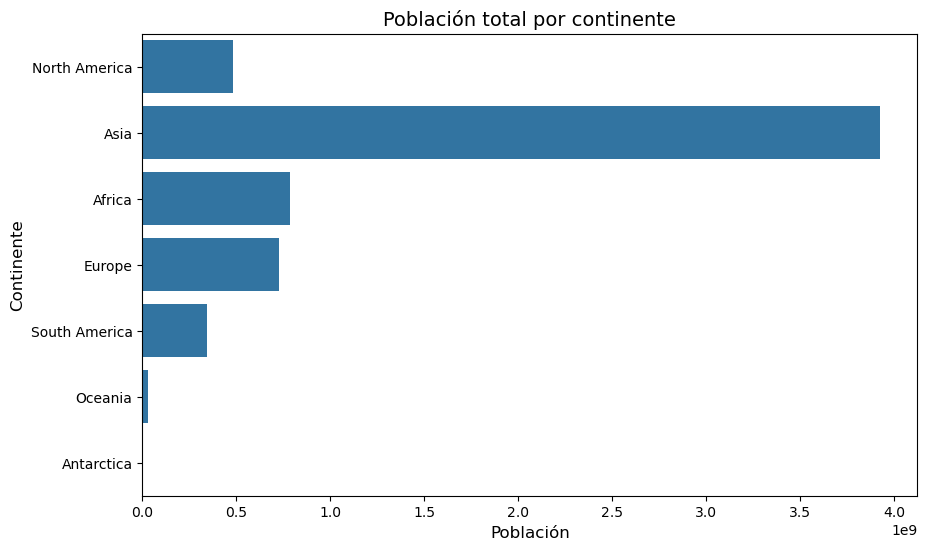

In [25]:
# Visualización de resultados. Aquí utilizamos Matplotlib y Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPopulation', y='Continent', data=pf3)
plt.title('Población total por continente', fontsize=14)
plt.xlabel('Población', fontsize=12)
plt.ylabel('Continente', fontsize=12)
plt.show()

# Ejercicio 4: Ciudades de Europa ordenadas por población

In [27]:
# Consulta para obtener las ciudades de Europa ordenadas por población
query4 = """
SELECT city.Name, city.Population
FROM city
JOIN country ON city.CountryCode = country.Code
WHERE country.Continent = 'Europe'
ORDER BY city.Population DESC;
"""
# Ejecutar la consulta
try:
    result_df = execute_query(connection, query4)
except mysql.connector.Error as err:
    print(f'Error en la consulta: {err}')

# Mostrar el DataFrame
print("Ejercicio 4 - Ciudades de Europa ordenadas por población:")
print(result_df)

Ejercicio 4 - Ciudades de Europa ordenadas por población:
                   Name  Population
0                Moscow     8389200
1                London     7285000
2         St Petersburg     4694000
3                Berlin     3386667
4                Madrid     2879052
..                  ...         ...
836          Serravalle        4802
837          San Marino        2294
838        Longyearbyen        1438
839        Monaco-Ville        1234
840  Città del Vaticano         455

[841 rows x 2 columns]


### Gráficos de barras:

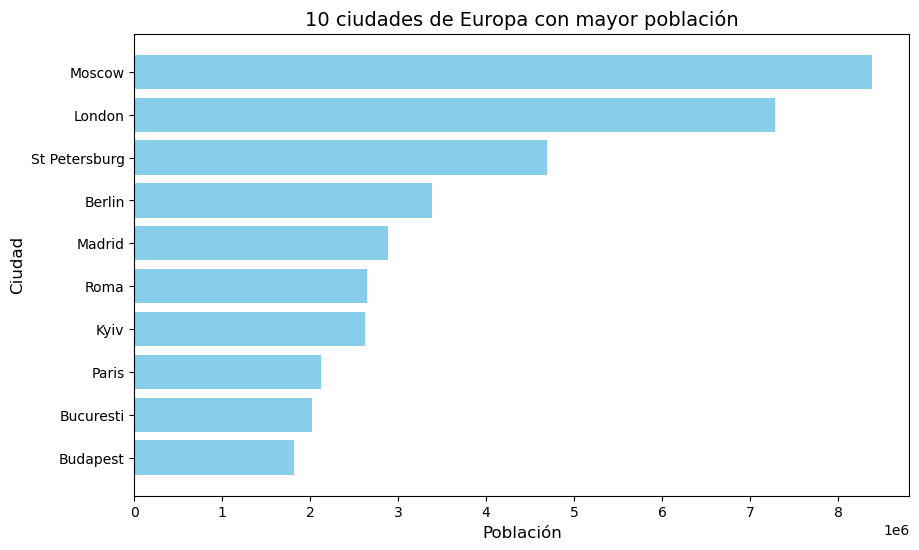

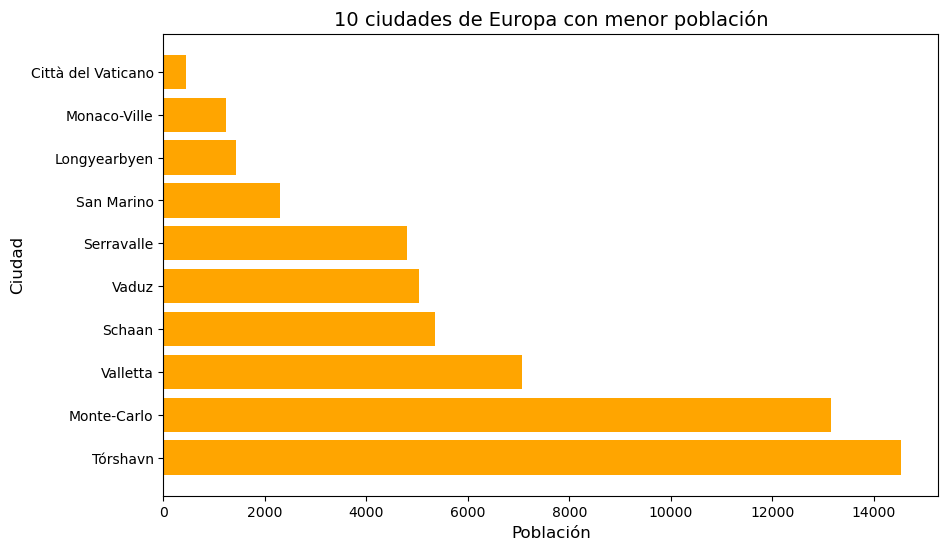

In [29]:
# Gráfico de barras para las 10 ciudades de Europa con mayor población
top_10 = result_df.nlargest(10, 'Population')
plt.figure(figsize=(10, 6))
plt.barh(top_10['Name'], top_10['Population'], color='skyblue')
plt.title('10 ciudades de Europa con mayor población', fontsize=14)
plt.xlabel('Población', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

# Gráfico de barras para las 10 ciudades de Europa con menor población
bottom_10 = result_df.nsmallest(10, 'Population')
plt.figure(figsize=(10, 6))
plt.barh(bottom_10['Name'], bottom_10['Population'], color='orange')
plt.title('10 ciudades de Europa con menor población', fontsize=14)
plt.xlabel('Población', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)
plt.gca().invert_yaxis()
plt.show()


# Ejercicio 5: Actualización de población de China

In [31]:
# Consulta para actualizar la población de China
query5 = """
UPDATE country
SET Population = 1500000000
WHERE Code = 'CHN';
"""

try:
    cursor = connection.cursor()
    cursor.execute(query5)  # Ejecutar la consulta
    connection.commit()  # Confirmar los cambios
    print("Ejercicio 5 - Población de China actualizada.")
except mysql.connector.Error as err:
    print(f"Error en la consulta: {err}")

# Consulta para obtener los datos actualizados de China
query6 = """
SELECT Name, Population FROM country WHERE Code = 'CHN';
"""

# Ejecutar la consulta para recuperar los datos actualizados
try:
    result_df = execute_query(connection, query6)  # Aquí se usa query6
    print("Ejercicio 5 - Valor de población de China actualizado:")
    print(result_df)
except mysql.connector.Error as err:
    print(f'Error en la consulta: {err}')


Ejercicio 5 - Población de China actualizada.
Ejercicio 5 - Valor de población de China actualizado:
    Name  Population
0  China  1500000000


# Cerrar la conexión con la BBDD

In [33]:
connection.close()
print("Conexión cerrada.")

Conexión cerrada.
